In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from imp import reload
import torch.nn as nn

import sys
sys.path.append("..")
import vnn
import vec_models
reload(vnn)

<module 'vnn' from '../vnn.py'>

In [2]:
def make_model(mono):
    model = nn.Sequential(
        vnn.Linear(1, 200, 200, first_layer=True, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono),
        vnn.tReLU(1, 200),
        vnn.Linear(1, 200, 200, mono=mono))
    return model

def init_exploding(model):
    model[0].weight.uniform_(0, np.sqrt(12.)/np.sqrt(200))
    for i in range(1, len(model)//2):
        model[2*i].weight.uniform_(0, np.sqrt(2*12)/np.sqrt(200))

def init_vanishing(model):
    model[0].weight.uniform_(0, 2./200)
    for i in range(1, len(model)//2):
        model[2*i].weight.uniform_(0, 4./200)

def compute_mean_and_std(model):
    input = torch.randn(128, 10, 200)
    input = input - input.mean(dim=-1, keepdim=True)
    input = input / input.std(dim=-1, keepdim=True)
    output = model(input)
    mean_per_layer = np.array([model[:2*i+1](input).mean().item() for i in range(len(model)//2)])
    std_per_layer = np.array([model[:2*i+1](input).std().item() for i in range(len(model)//2)])
    return mean_per_layer, std_per_layer

model_1 = make_model(False)
init_exploding(model_1)
mean_1, std_1 = compute_mean_and_std(model_1)

model_2 = make_model(False)
init_vanishing(model_2)
mean_2, std_2 = compute_mean_and_std(model_2)

model_3 = make_model(True)
mean_3, std_3 = compute_mean_and_std(model_3)

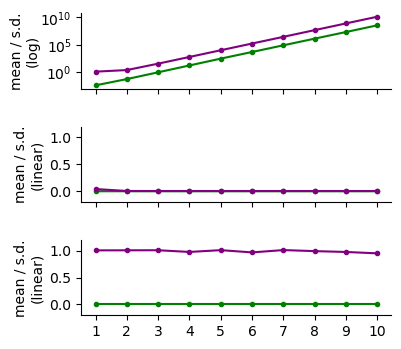

In [136]:
fig, axes = plt.subplots(3, 1, figsize=(4, 4), dpi=100, sharex=True)
fig.subplots_adjust(hspace=0.5)
ax1, ax2, ax3 = axes

x = np.arange(10) + 1
params_mean = {"color": "green", "marker": "."}
params_std = {"color": "purple", "marker": "."}

ax1.plot(x, np.abs(mean_1), **params_mean)
ax1.plot(x, std_1, **params_std)
ax1.set_yscale("log")
ax1.set_yticks([10**0, 10**5, 10**10])

ax2.plot(x, np.abs(mean_2), **params_mean)
ax2.plot(x, std_2, **params_std)
ax2.set_ylim(-0.2, 1.2)
ax2.set_yticks([0, 1/2, 1])
#ax2.set_yscale("log")

ax3.plot(x, np.abs(mean_3), **params_mean)
ax3.plot(x, std_3, **params_std)
ax3.set_ylim(-0.2, 1.2)
ax3.set_yticks([0, 1/2, 1])

ax1.set_xticks(x)

for ax in axes:
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
ax1.set_ylabel("mean / s.d.\n(log)", labelpad=0)
ax2.set_ylabel("mean / s.d.\n(linear)")
ax3.set_ylabel("mean / s.d.\n(linear)")

#plt.savefig("../figs/init_plots.pdf", bbox_inches="tight")

plt.show()

(0.298671330159243, 0.5740669161042754)

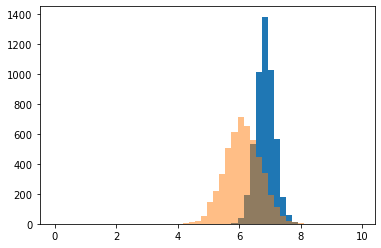

In [233]:
n = 5000
W = np.random.uniform(0, np.sqrt(12/n), (n, n))
h1 = W.dot(np.random.uniform(-.45, .55, (n,)))
h2 = (W * np.random.uniform(-.45, .55, (n, n))).sum(axis=1)

r = np.max(np.abs(np.concatenate((h1, h2)))) * 1.2
plt.hist(h1, range=(0, r), bins=50)
plt.hist(h2, range=(0, r), bins=50, alpha=0.5)

h1.std(), h2.std()

(-1.1, 1.1)

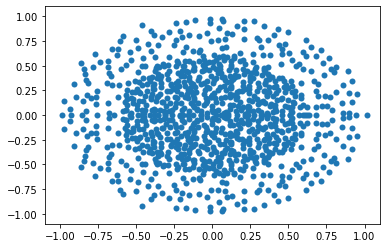

In [244]:
n = 500
A = np.random.randn(n, n)/np.sqrt(n)

A_big = np.zeros((2*n, 2*n))
A_big[:n, :n] = np.maximum(A, 0)
A_big[n:, n:] = np.maximum(A, 0)
A_big[n:, :n] = np.maximum(-A, 0)
A_big[:n, n:] = np.maximum(-A, 0)

w = np.linalg.eigvals(A_big)

plt.scatter(w.real, w.imag, lw=0)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

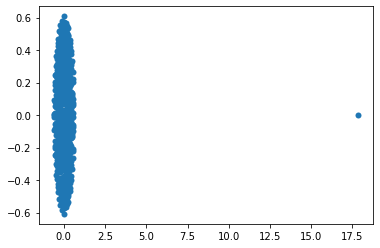

In [243]:
w = np.linalg.eigvals(np.abs(A))
plt.scatter(w.real, w.imag, lw=0)

(array([  2.,   5.,  29.,  71., 157., 127.,  75.,  25.,   8.,   1.]),
 array([0.22381559, 0.22932624, 0.23483689, 0.24034754, 0.2458582 ,
        0.25136885, 0.2568795 , 0.26239015, 0.26790081, 0.27341146,
        0.27892211]),
 <BarContainer object of 10 artists>)

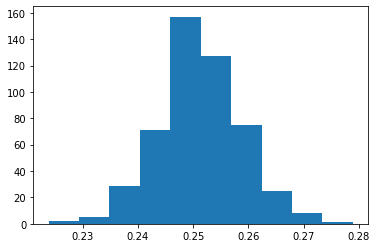

In [246]:
n = 500
W = np.random.uniform(0, 1, (n, n))/np.sqrt(n)
x = np.random.uniform(0, 1, (n,))/np.sqrt(n)
h = W.dot(x)

plt.hist(h)

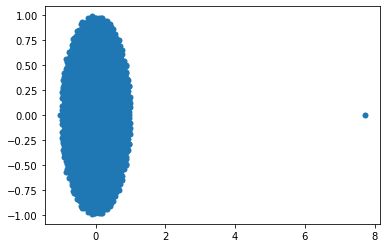

In [260]:
n = 2000
W = (np.random.uniform(0, 1, (n, n)) - 0.45)*np.sqrt(12/n)
w = np.linalg.eigvals(W)
plt.scatter(w.real, w.imag, lw=0)

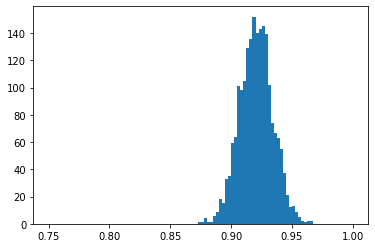

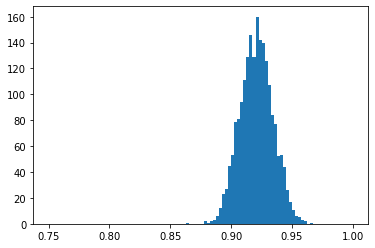

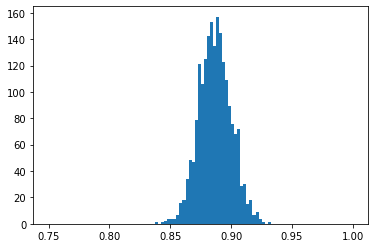

In [395]:
n = 2000

for _ in range(3):
    W = 1.05 * np.random.uniform(0, 1, (n, n))*np.sqrt(12/n)
    x = np.random.uniform(0, 1, (n,))/np.sqrt(n)
    h = W.dot(x)
    plt.hist(h, range=(.75, 1), bins=100, alpha=1)
    plt.show()

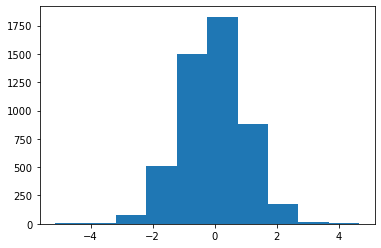

-0.05472345251079023 1.0164915648716661


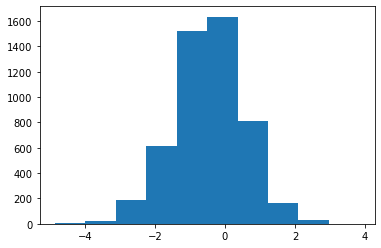

-0.44952913952893125 0.9995529201630378


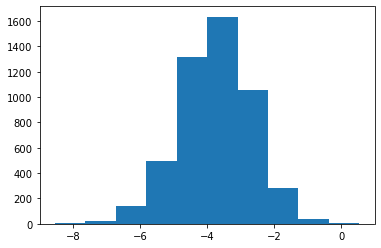

-3.750784845765737 1.0800033080449571


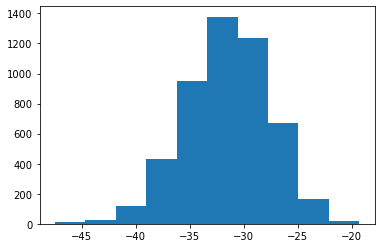

-31.48835212251213 3.913045326386356


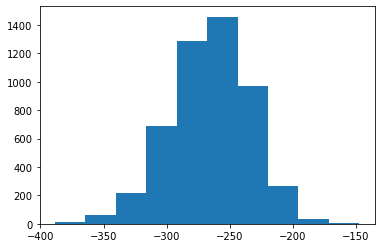

-265.6016578257952 31.598392099610233


In [421]:
n = 5000

def sample_W():
    W = np.random.gamma(shape=1/np.sqrt(n), scale=1/n**0.25, size=(n, n))
    return W
    
h = np.random.normal(0, 1, (n,))
for i in range(5):
    W = sample_W()
    h = W.dot(h)
    plt.hist(h)
    plt.show()
    print(h.mean(), h.std())

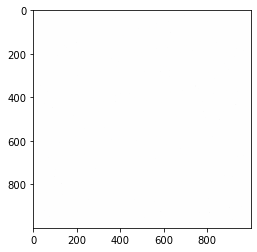

In [362]:
r = np.max(np.abs(W))
plt.imshow(W, vmin=-r, vmax=r, cmap="RdGy")

In [343]:
w = W.flatten()
cdf = np.cumsum(np.sort(w)[::-1]) / np.sum(w)

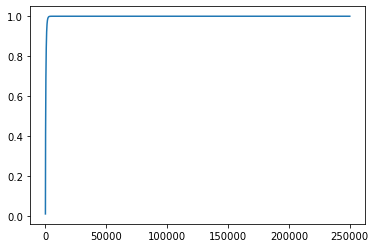

In [344]:
plt.plot(cdf)

In [404]:
n = 1000
W = np.random.gamma(shape=1/n, scale=1, size=(n, n))
w = np.linalg.eigvals(W)
#plt.hist(w.real[w.real < 2.])

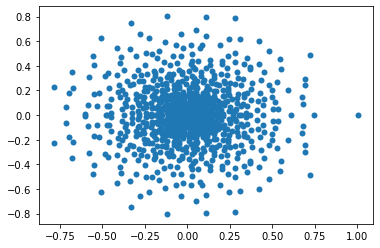

In [405]:
plt.scatter(w.real, w.imag, lw=0)

(array([ 10.,  34.,  81., 179., 450., 145.,  66.,  23.,  11.,   1.]),
 array([-0.78650498, -0.60717418, -0.42784338, -0.24851258, -0.06918178,
         0.11014901,  0.28947981,  0.46881061,  0.64814141,  0.82747221,
         1.006803  ]),
 <BarContainer object of 10 artists>)

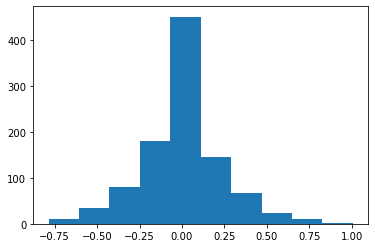

In [406]:
plt.hist(w.real)

In [416]:
A = (W - W.mean())/W.std()

In [417]:
w = np.linalg.eigvals(A/np.sqrt(n))

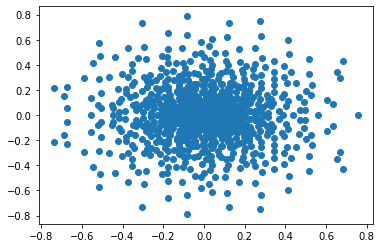

In [418]:
plt.scatter(w.real, w.imag)

In [3]:
model = model_3

In [29]:
mono = True
model = nn.Sequential(
        vnn.Linear(10, 2000, 200, first_layer=True, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 200, mono=mono),
        vnn.tReLU(10, 200),
        vnn.Linear(10, 200, 1, mono=mono))



In [30]:
input = vnn.expand_input(torch.randn(128, 200), 10)
#input = input - input.mean(dim=-1, keepdim=True)
#input = input / input.std(dim=-1, keepdim=True)
output = model(input)[..., 0]
labels = torch.randint(0, 10, (len(input),))
g_vals = vnn.set_model_grads(model, output, labels, learning_rule="bp", reduction="mean", return_g=True)

In [31]:
layers = np.arange(1, 22, 2)
gv = [g_vals[i].numpy() for i in layers]

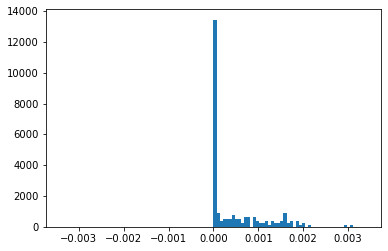

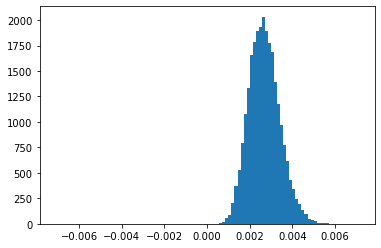

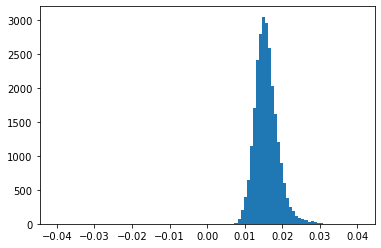

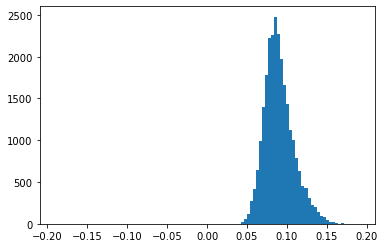

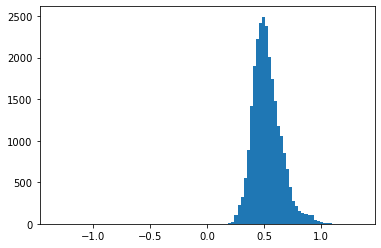

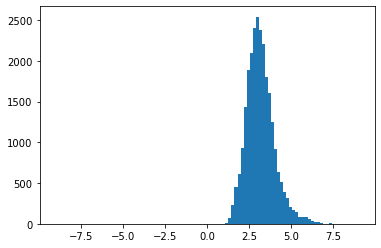

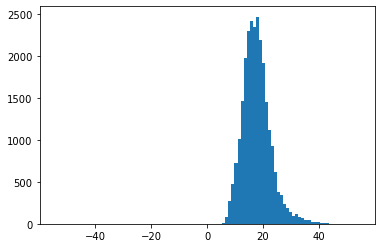

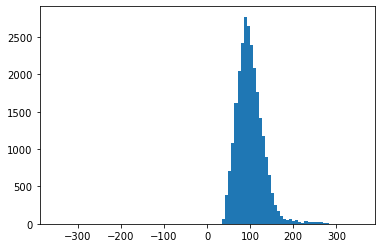

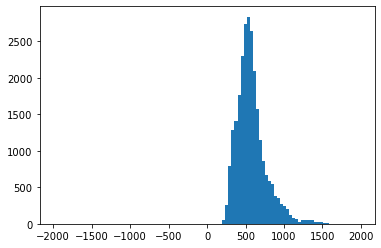

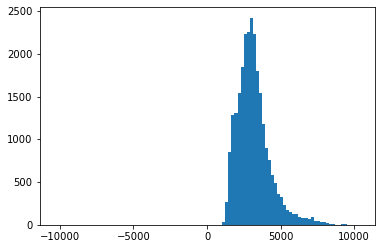

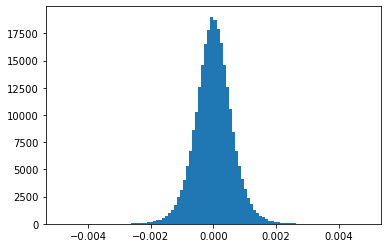

In [34]:
for g in gv:
    r = np.max(np.abs(g))*1.1
    plt.hist(g.flatten(), range=(-r, r), bins=100)
    plt.show()